In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
# get directory
curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)  # I go up
os.chdir(parent_dir)
print(parent_dir)

/Users/luciapapalini/Desktop/cmepda


In [7]:
import keras

In [8]:
history = np.load("trained/lstmenc_aug/history.npy", allow_pickle=True).item()

In [9]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

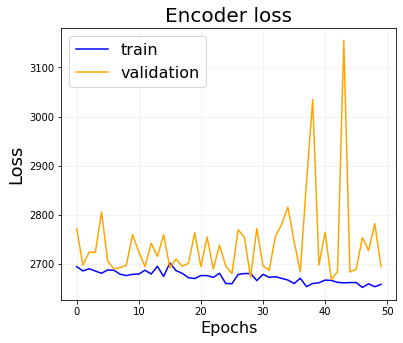

In [41]:
# epochs
epochs = np.arange(len(history.history['loss']))

# plot LOSS

plt.figure(figsize=(6, 5))
plt.title("Encoder loss", fontsize=20)
plt.plot(epochs[:], history.history['loss'][:], color='blue', label='train')
plt.plot(epochs[:], history.history['val_loss'][:], color='orange', label='validation')
plt.legend(fontsize=16)
plt.grid(alpha=0.2)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=18)
plt.savefig("docs/slides/figures/whole_aug_loss.png")

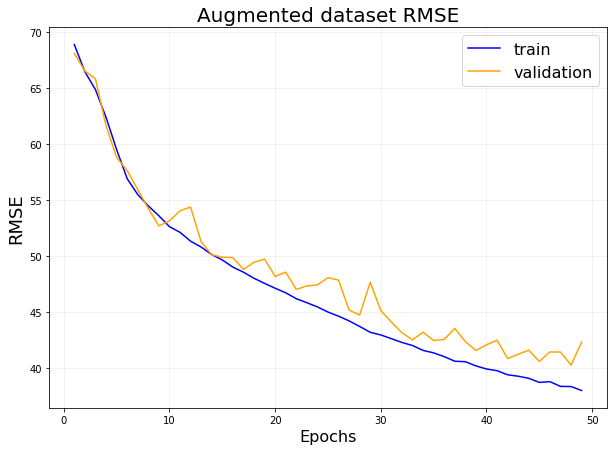

In [45]:
# epochs
epochs = np.arange(len(history.history['loss']))

# plot LOSS

plt.figure(figsize=(10, 7))
plt.title("Augmented dataset RMSE", fontsize=20)
plt.plot(epochs[1:], history.history['root_mean_squared_error'][1:], color='blue', label='train')
plt.plot(epochs[1:], history.history['val_root_mean_squared_error'][1:], color='orange', label='validation')
plt.legend(fontsize=16)
plt.grid(alpha=0.2)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('RMSE', fontsize=18)
plt.savefig("docs/slides/figures/lstmenc_aug_rmse.png")

In [10]:
from context import stats
from context import LstmEncoder

In [11]:
# Call the nets
lstmenc_vanilla = LstmEncoder(path="trained/lstmenc_train_sub")
lstmenc_aug = LstmEncoder(path="trained/lstmenc_aug")

Remote monitor available

Remote monitor available

Model: "ToAEncoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 toa_input (InputLayer)      [(None, 9, 9, 1)]         0         
                                                                 
 enc_dense_a (Dense)         (None, 9, 9, 256)         512       
                                                                 
 enc_dense_b (Dense)         (None, 9, 9, 128)         32896     
                                                                 
 enc_dense_c (Dense)         (None, 9, 9, 64)          8256      
                                                                 
 enc_dense_d (Dense)         (None, 9, 9, 1)           65        
                                                                 
 enc_flatten (Flatten)       (None, 81)                0         
                                                                 
 enc_out (Dense)             (None, 1)                 8

Remote monitor available

Model: "LstmEncoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 toa_input (InputLayer)         [(None, 9, 9, 1)]    0           []                               
                                                                                                  
 enc_dense_a (Dense)            (None, 9, 9, 256)    512         ['toa_input[0][0]']              
                                                                                                  
 enc_dense_b (Dense)            (None, 9, 9, 128)    32896       ['enc_dense_a[0][0]']            
                                                                                                  
 enc_dense_c (Dense)            (None, 9, 9, 64)     8256        ['enc_dense_b[0][0]']            
                                                                                        

Trained model folder found in trained/lstmenc_train_sub

Loading the model...

done!

Remote monitor available

Remote monitor available

Model: "ToAEncoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 toa_input (InputLayer)      [(None, 9, 9, 1)]         0         
                                                                 
 enc_dense_a (Dense)         (None, 9, 9, 256)         512       
                                                                 
 enc_dense_b (Dense)         (None, 9, 9, 128)         32896     
                                                                 
 enc_dense_c (Dense)         (None, 9, 9, 64)          8256      
                                                                 
 enc_dense_d (Dense)         (None, 9, 9, 1)           65        
                                                                 
 enc_flatten (Flatten)       (None, 81)                0         
                                                                 
 enc_out (Dense)             (None, 1)                 8

Remote monitor available

Model: "LstmEncoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 toa_input (InputLayer)         [(None, 9, 9, 1)]    0           []                               
                                                                                                  
 enc_dense_a (Dense)            (None, 9, 9, 256)    512         ['toa_input[0][0]']              
                                                                                                  
 enc_dense_b (Dense)            (None, 9, 9, 128)    32896       ['enc_dense_a[0][0]']            
                                                                                                  
 enc_dense_c (Dense)            (None, 9, 9, 64)     8256        ['enc_dense_b[0][0]']            
                                                                                        

Trained model folder found in trained/lstmenc_aug

Loading the model...

done!

In [12]:
# DataFeeder
from context import DataFeeder

BATCH_SIZE = 128

# Feeder options for both
feeder_options = {
    "shuffle": True,
    "batch_size": BATCH_SIZE,
    "input_fields": ["toa","time_series"],
    "target_field": "outcome",
}

# call same vanilla test dataset for both 
train_feeder = DataFeeder("data_by_entry/train", **feeder_options)

Found 70000 files in data_by_entry/train: ['part_045809.npy', 'part_025125.npy', 'part_063170.npy']..

Shuffled indexes in DataFeeder(data_by_entry/train)

25-interpercentile: ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

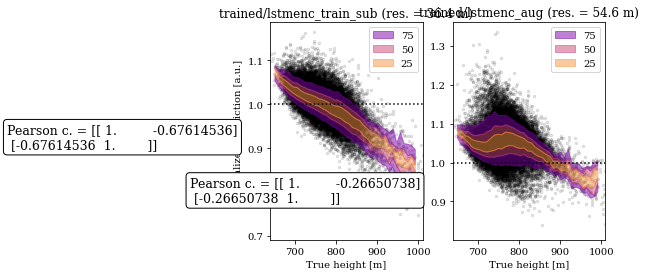

In [14]:
stats.interpercentile_plot(
    [lstmenc_vanilla, lstmenc_aug],
    "data_by_entry/test",
    [feeder_options, feeder_options],
    plot_type="normalized",
)